<a href="https://colab.research.google.com/github/nicecarrot/AI-Study/blob/main/4day_ScikitLearn_Iris_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

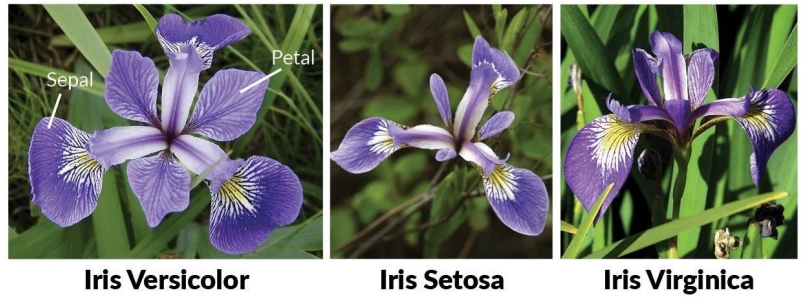

Iris 데이터 세트의 Feature(특성)

- Petal(꽃잎)의 길이와 너비

- Sepal(꽃받침)의 길이와 너비

## Iris(붓꽃) 품종 분류 모델 만들기

sklearn 버전 확인

In [1]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


모델 구현을 위한 라이브러리 import

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

Iris 데이터셋 load 및 데이터 확인

In [3]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [6]:
  # loas_iris 할 경우, 데이터 구성 요소 파악
iris_data = iris.data
iris_label = iris.target

print('iris target value : ', iris_label)
print('iris target name : ', iris.target_names)

iris target value :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target name :  ['setosa' 'versicolor' 'virginica']


In [7]:
# 데이터 타입 확인
print(type(iris_data))

<class 'numpy.ndarray'>


In [8]:
# pandas 데이터 프레임으로 가공
# pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df_iris = pd.DataFrame(data = iris_data, columns = iris.feature_names)

# pandas 열 추가
df_iris['label'] = iris.target

df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Iris 데이터셋 분할(학습/ 테스트)

> * train_test_split 함수의 파라미터 소개

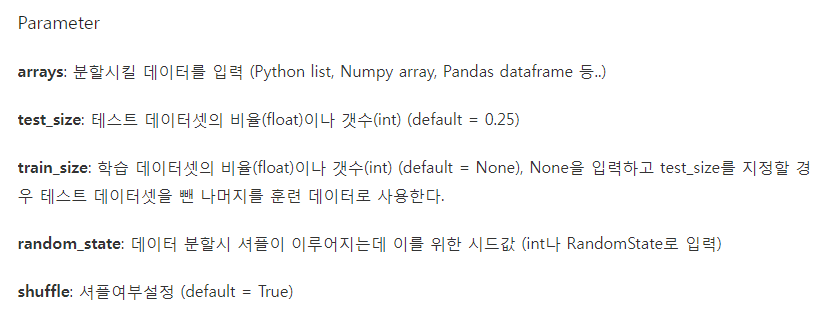

In [10]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

Decision Tree 모델 객체 생성

In [13]:
dt_clf = DecisionTreeClassifier(random_state = 11)

Decision Tree 모델 객체 학습

In [14]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

테스트 데이터를 이용한 예측

In [15]:
pred = dt_clf.predict(x_test)

Accuracy(정확도)를 통한 성능 평가

In [16]:
from sklearn.metrics import accuracy_score
print('predict accuracy: {} '.format(accuracy_score(y_test, pred)))

predict accuracy: 0.9333333333333333 
